In [37]:
import pandas as pd


from prophet.diagnostics import cross_validation, performance_metrics

import matplotlib.pyplot as plt

import seaborn as sb
import numpy as np
from prophet import Prophet
import itertools


## 데이터 확인

In [38]:
train_df = pd.read_csv("./open/train.csv")

In [39]:
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      23011 non-null  object 
 1   최고기온    23008 non-null  float64
 2   최저기온    23008 non-null  float64
 3   일교차     23007 non-null  float64
 4   강수량     9150 non-null   float64
 5   평균습도    23011 non-null  float64
 6   평균풍속    23007 non-null  float64
 7   일조합     22893 non-null  float64
 8   일사합     18149 non-null  float64
 9   일조율     22645 non-null  float64
 10  평균기온    23011 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.9+ MB


,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6


### 일시 데이터 datetime으로 변경

In [40]:
train_df['일시'] = pd.to_datetime(train_df['일시']) 

<Axes: xlabel='강수량', ylabel='평균기온'>

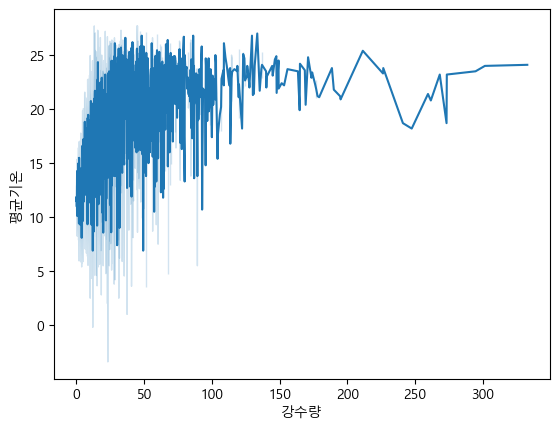

In [42]:
plt.rc("font", family="Malgun Gothic")

sb.lineplot(x="강수량", y="평균기온", data=train_df)

### 계절 변수 생성

C:\Users\yis82\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yis82\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yis82\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yis82\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yis82\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44200 (\N{HANGUL SYLLABLE GYEO}) m

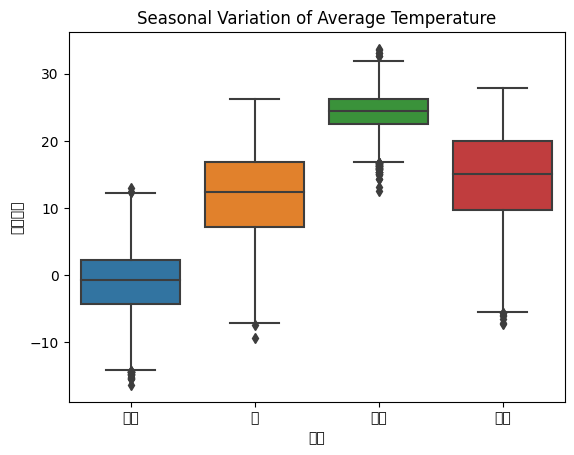

In [ ]:
# '일시' 열을 datetime 형식으로 변환
train_df["일시"] = pd.to_datetime(train_df["일시"])

# '월' 정보를 추출하여 '계절' 변수 생성
train_df["월"] = train_df["일시"].dt.month
train_df["계절"] = train_df["월"].apply(
    lambda x: "봄"
    if 3 <= x <= 5
    else ("여름" if 6 <= x <= 8 else ("가을" if 9 <= x <= 11 else "겨울"))
)

# '계절' 변수와 '평균기온' 간의 관계 시각화 또는 분석 수행
# 예를 들어, boxplot을 이용하여 각 계절의 평균기온 분포를 확인할 수 있습니다.
sb.boxplot(x="계절", y="평균기온", data=train_df)
plt.title("Seasonal Variation of Average Temperature")
plt.show()

계절 간의 평균 기온차이가 있는 것을 확인가능.

## Prophet을 사용한 예측

-  prophet에서 데이터를 인식하도록 일시는 ds로, target값인 평균기온은 y로 지정해줍니다.


In [ ]:
# train_df.rename(columns={'일시':'ds',"평균기온":"y"},inplace=True)

In [ ]:
# m = Prophet(changepoint_prior_scale=0.05)
# m.add_seasonality(name="quarterly", period=365.25 / 4, fourier_order=5)
# m.fit(train_df)

10:03:49 - cmdstanpy - INFO - Chain [1] start processing
10:03:56 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
len(train_df)

23011

In [ ]:
train_df

,ds,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,y,월,계절
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6,1,겨울
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9,1,겨울
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0,1,겨울
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5,1,겨울
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6,1,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23006,2022-12-27,3.3,-7.3,10.6,NaN,69.8,1.8,8.8,10.25,91.7,-2.6,12,겨울
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3,12,겨울
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9,12,겨울
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8,12,겨울


#### 최고기온, 최저기온, 일교차, 강수량, 평균풍속, 일조합, 일사합에 결측치를 처리할 필요가 있다

최고기온, 최저기온, 평균풍속, 일조합, 일사합 결측치는 선형보간으로 대체
보간된 최고기온과 최저기온을 통해 일교차 결측치를 계산


In [ ]:
train_df.isnull().sum()     

ds          0
최고기온        3
최저기온        3
일교차         4
강수량     13861
평균습도        0
평균풍속        4
일조합       118
일사합      4862
일조율       366
y           0
월           0
계절          0
dtype: int64

In [ ]:
null_cols = ["최고기온", "최저기온", "평균풍속", "일조합", "일사합"]
for col in null_cols:
    train_df[col].interpolate(method="linear", inplace=True)

train_df["일교차"] = train_df["최고기온"] - train_df["최저기온"]

In [ ]:
train_df.loc[train_df["강수량"].isnull(), "강수량"] = 0.0

##### 일사합과 일조율은 

In [ ]:
train_df

,ds,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,y,월,계절
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6,1,겨울
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9,1,겨울
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0,1,겨울
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5,1,겨울
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6,1,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23006,2022-12-27,3.3,-7.3,10.6,NaN,69.8,1.8,8.8,10.25,91.7,-2.6,12,겨울
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3,12,겨울
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9,12,겨울
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8,12,겨울


In [ ]:
from prophet import Prophet

# Assuming train_df is your training DataFrame with 'ds', 'y', and external regressors

# Initialize the Prophet model
m = Prophet()
# Add external regressors
m.add_regressor("external_regressor1")
m.add_regressor("external_regressor2")

# Fit the model
m.fit(train_df)

# Prepare future DataFrame (including future values for external regressors)
future = m.make_future_dataframe(periods=60)  # 60 days into the future
future["external_regressor1"] = ...  # Add future values for external_regressor1
future["external_regressor2"] = ...  # Add future values for external_regressor2

# Make predictions
forecast = m.predict(future)

In [ ]:
from prophet import Prophet
import numpy as np

# Fit the model
m = Prophet(changepoint_prior_scale=0.05)
m.add_seasonality(name="", period=365.25, fourier_order=5)
model = m.fit(train_df)

# Make predictions
future = m.make_future_dataframe(
    periods=0
)  # Use 0 if you only want to fit on training data
forecast = m.predict(future)

# Calculate residuals
residuals = train_df["y"] - forecast["yhat"][: len(train_df)]

# Approximate log-likelihood
n = len(train_df)
sigma2 = np.var(residuals)
log_likelihood = (
    -n / 2 * np.log(2 * np.pi)
    - n / 2 * np.log(sigma2)
    - 1 / (2 * sigma2) * np.sum(residuals**2)
)

# Count number of parameters
# For simplicity, count the number of changepoints, seasonality parameters, and base parameters
num_changepoints = len(model.params["delta"][0])
num_seasonality_parameters = 5  # Fourier order for quarterly
num_base_parameters = 1  # Just the growth rate for now
p = num_changepoints + num_seasonality_parameters + num_base_parameters

# Calculate AIC
AIC = 2 * p - 2 * log_likelihood

11:28:39 - cmdstanpy - INFO - Chain [1] start processing
11:28:43 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
AIC

118622.77567677808

In [ ]:
AIC

118630.75804455281

In [ ]:
AIC

118718.49622745032

In [ ]:
future = m.make_future_dataframe(periods=358, freq="d")
forecast = m.predict(future)

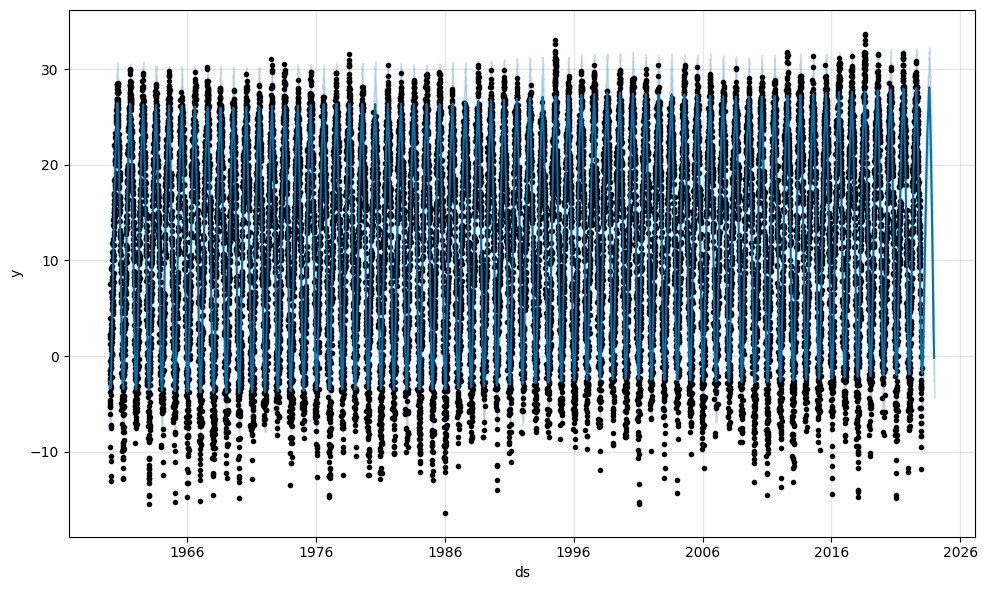

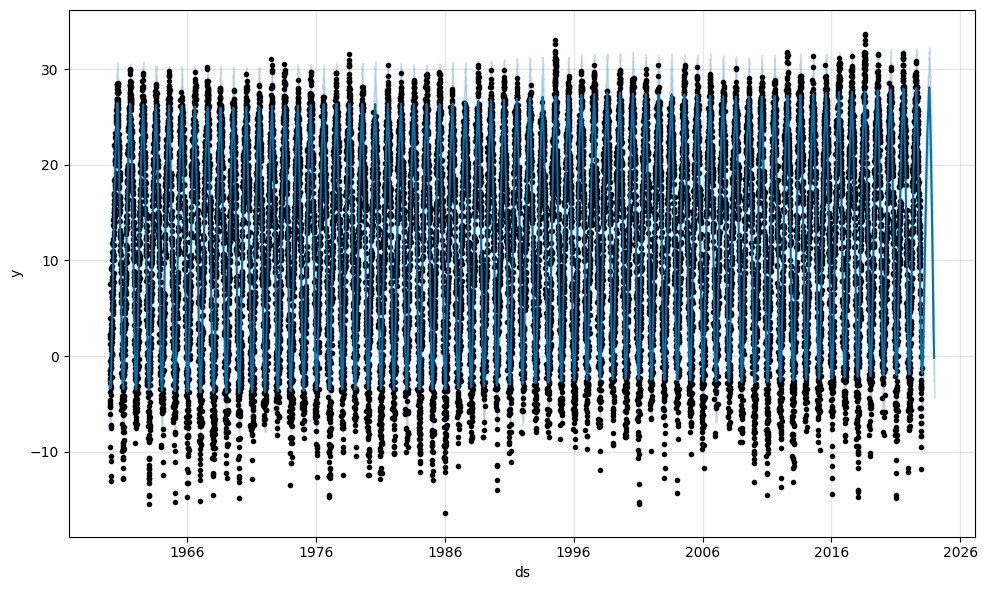

In [ ]:
m.plot(forecast)

In [ ]:
predict = list(forecast[forecast["ds"].apply(lambda x: x.year) == 2023]["yhat"])

In [ ]:
submission = pd.read_csv("./open/sample_submission.csv")
submission["평균기온"] = predict
submission

,일시,평균기온
0,2023-01-01,-1.083313
1,2023-01-02,-1.156044
2,2023-01-03,-1.248000
3,2023-01-04,-1.295499
4,2023-01-05,-1.323980
...,...,...
353,2023-12-20,0.452361
354,2023-12-21,0.305392
355,2023-12-22,0.131745
356,2023-12-23,0.027570


In [ ]:
submission.to_csv("./3__20231217.csv", index=False)

In [ ]:
param_grid = {
    "changepoint_prior_scale": [0.001, 0.005, 0.01, 0.03],
    "seasonality_prior_scale": [0.1, 0.5, 1.0, 3.0],
    "seasonality_mode": ["additive", "multiplicative"],
}

all_params = [
    dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())
]
maes = []

# initial: 학습할 구간, horizon: 예측할 구간, period: cutoff 간격
# 3년 주기로 15년치를 학습하고 이후 1년을 예측
for params in all_params:
    m = prophet.Prophet(**params, yearly_seasonality=True).fit(
        train_df
    )  # Fit model with given params
    df_cv = cross_validation(
        m,
        initial="5475 days",
        period="1095 days",
        horizon="365 days",
        parallel="processes",
    )
    df_p = performance_metrics(df_cv, rolling_window=1)
    maes.append(df_p["mae"].values[0])


tuning_results = pd.DataFrame(all_params)
tuning_results["mae"] = maes
print(tuning_results)

NameError: name 'prophet' is not defined

In [ ]:
# 최적의 hyper parameter 확인   
best_params = all_params[np.argmin(maes)]
print(best_params)

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'additive'}


In [ ]:
m = Prophet(**best_params, yearly_seasonality=True)
m.fit(train_df)
future = m.make_future_dataframe(periods=358, freq="d")
forecast = m.predict(future)

23:45:18 - cmdstanpy - INFO - Chain [1] start processing
23:45:20 - cmdstanpy - INFO - Chain [1] done processing


c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\prophet\plot.py:94: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
C:\Users\yis82\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


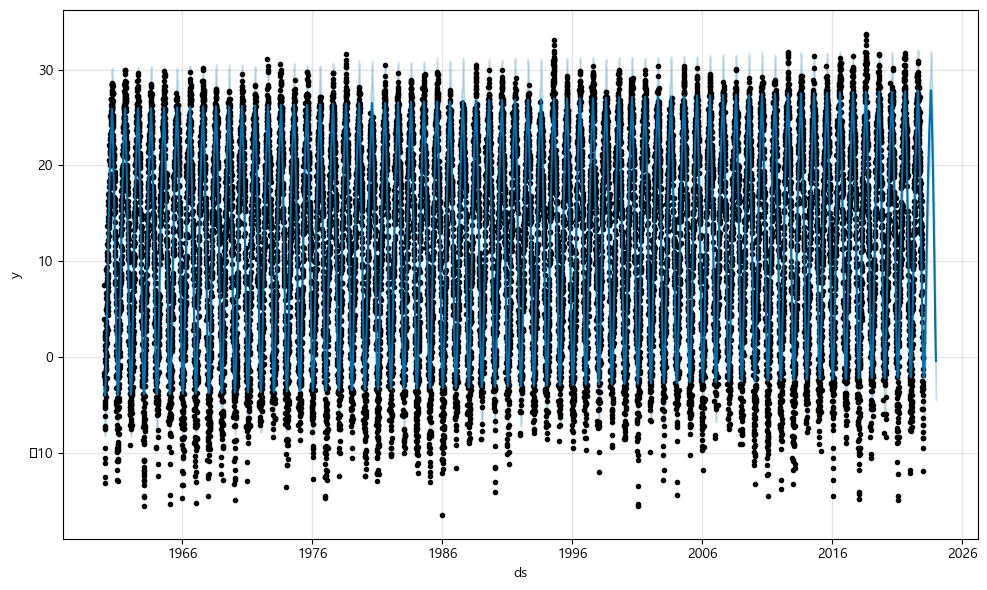

C:\Users\yis82\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


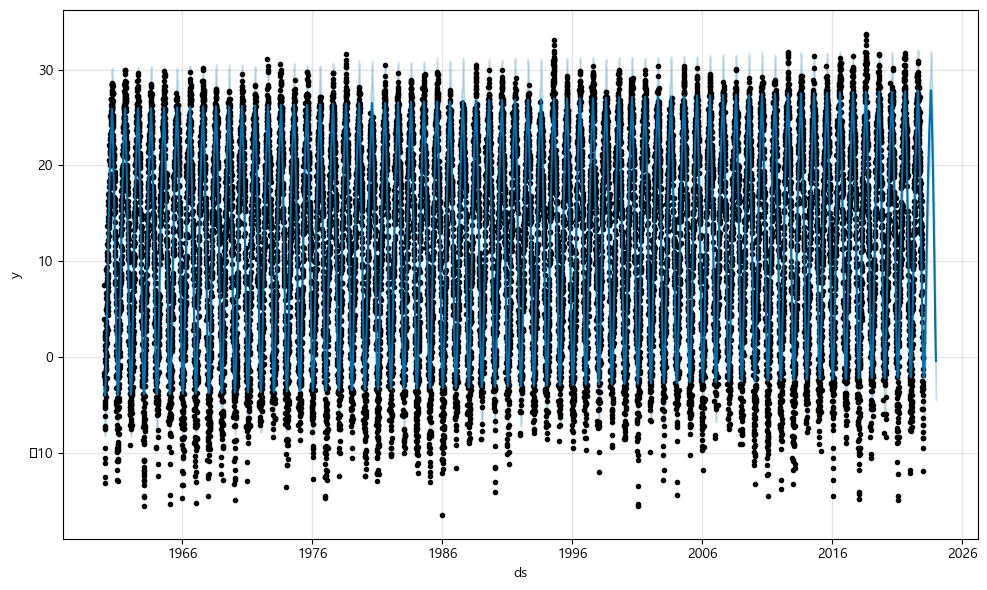

In [ ]:
m.plot(forecast)

In [ ]:
predict = list(forecast[forecast["ds"].apply(lambda x: x.year) == 2023]["yhat"])

In [ ]:
submission = pd.read_csv("./open/sample_submission.csv")
submission["평균기온"] = predict
submission

,일시,평균기온
0,2023-01-01,-1.305874
1,2023-01-02,-1.407339
2,2023-01-03,-1.523243
3,2023-01-04,-1.588105
4,2023-01-05,-1.626453
...,...,...
353,2023-12-20,0.109126
354,2023-12-21,0.002057
355,2023-12-22,-0.129993
356,2023-12-23,-0.195058


In [ ]:
submission.to_csv("./2__20231217.csv", index=False)